In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define symbolic variables
u, v = sp.symbols('u v')

# Coordinate transformation
x = sp.cosh(u) * sp.cos(v)
y = sp.cosh(u) * sp.sin(v)
z = sp.sinh(u)

# Compute derivatives
dx_du = sp.diff(x, u)
dx_dv = sp.diff(x, v)

dy_du = sp.diff(y, u)
dy_dv = sp.diff(y, v)

dz_du = sp.diff(z, u)
dz_dv = sp.diff(z, v)


In [2]:
# Compute metric components h_ab = g_ij (dx^i/dξ^a) (dx^j/dξ^b)
g_ij = sp.Matrix([[1, 0, 0], [0, 1, 0], [0, 0, -1]])  # Minkowski metric in R^3

# Construct Jacobian matrix (∂r^i/∂ξ^a)
J = sp.Matrix([
    [dx_du, dy_du, dz_du],
    [dx_dv, dy_dv, dz_dv]
])

# Compute induced metric h_ab = J * g_ij * J^T
h_ab = J * g_ij * J.T
h_ab = sp.simplify(h_ab)

# Display the metric
print("Induced Metric (h_ab):")
h_ab

Induced Metric (h_ab):


Matrix([
[-1,          0],
[ 0, cosh(u)**2]])

In [3]:
# Compute determinant of the metric
det_h = np.abs(h_ab.det())
print("\nDeterminant of h_ab:")
det_h


Determinant of h_ab:


Abs(cosh(u)**2)

In [4]:
# Compute area element dA = sqrt(|det(h_ab)|) dudv
dA = sp.sqrt(sp.Abs(det_h))
print("\nArea element dA:")
dA


Area element dA:


sqrt(Abs(cosh(u)**2))

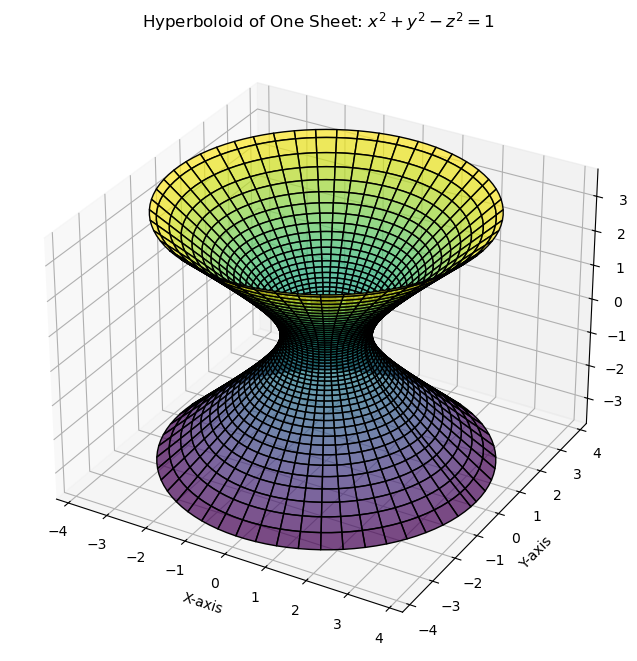

In [15]:
# Define grid for parameters u and v
u = np.linspace(-2, 2, 100)  # Controls hyperboloid height
v = np.linspace(0, 2 * np.pi, 100)  # Azimuthal angle

# Create meshgrid
U, V = np.meshgrid(u, v)

# Parametric equations of hyperboloid
X = np.cosh(U) * np.cos(V)
Y = np.cosh(U) * np.sin(V)
Z = np.sinh(U)

# Create figure and 3D axis
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot surface
ax.plot_surface(X, Y, Z, cmap="viridis", edgecolor='k', alpha=0.7)

# Labels and title
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("Hyperboloid of One Sheet: $x^2 + y^2 - z^2 = 1$")

# Show plot
plt.show()

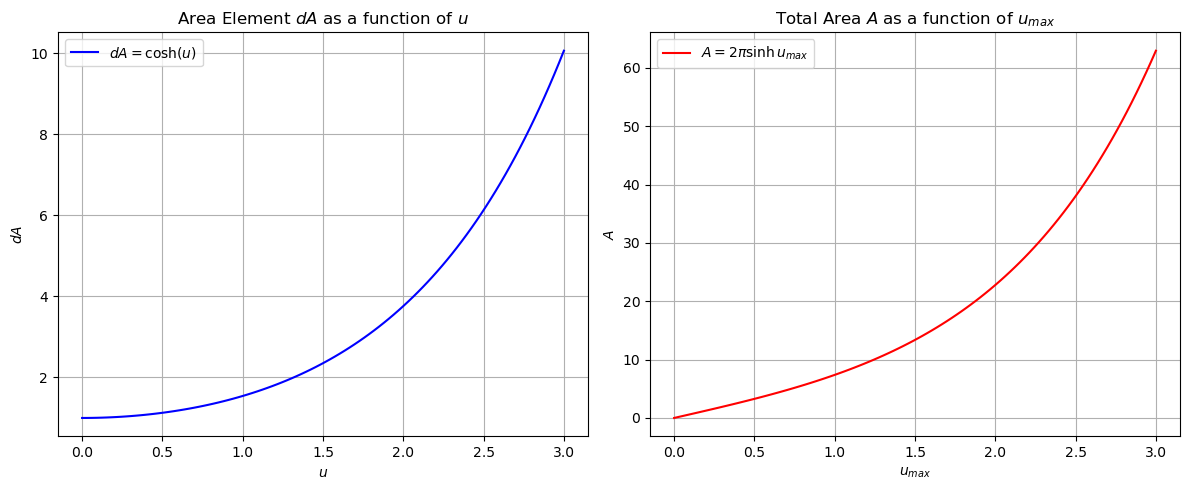

In [6]:
# Define the functions
def dA(u):
    return np.cosh(u)  # Area element dA = cosh(u)

def total_area(u_max):
    return 2 * np.pi * np.sinh(u_max)  # Total area formula

# Generate values for u
u_values = np.linspace(0, 3, 100)
dA_values = dA(u_values)

# Generate values for u_max
u_max_values = np.linspace(0, 3, 100)
total_area_values = total_area(u_max_values)

# Plot dA(u)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(u_values, dA_values, label=r'$dA = \cosh(u)$', color='blue')
plt.xlabel(r'$u$')
plt.ylabel(r'$dA$')
plt.title("Area Element $dA$ as a function of $u$")
plt.legend()
plt.grid()

# Plot Total Area A(u_max)
plt.subplot(1, 2, 2)
plt.plot(u_max_values, total_area_values, label=r'$A = 2\pi \sinh u_{max}$', color='red')
plt.xlabel(r'$u_{max}$')
plt.ylabel(r'$A$')
plt.title("Total Area $A$ as a function of $u_{max}$")
plt.legend()
plt.grid()

# Show plots
plt.tight_layout()
plt.show()
